# Diabetes Database
The datasets consists of several medical predictor variables and one Outcome (Yes or No diabetes). Predictor variables includes the number of pregnancies the patient has had, their Body Mass Index, insulin and glucose level, blood pressure,Diabetes Pedigree (likelihood of diabetes based on family history), age, and so on.


# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

# Data

In [2]:
dataset = pd.read_csv('DiabeticData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,NumberOfPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,InsulinLevel,BodyMassIndex,DiabetesPedigree,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


# Encoding the Output Data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the Dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN Model

## Initializing the ANN

In [7]:
Model=tf.keras.models.Sequential()

## Adding the Input Layer

In [8]:
Model.add(tf.keras.layers.Dense(8,activation='relu'))

## Adding the First Hidden Layer

In [9]:
Model.add(tf.keras.layers.Dense(16,activation='relu'))

## Adding the Output Layer

In [10]:
Model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

## Compiling the ANN

In [11]:
Model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# For Regression Problem: 'mean_squared_error'
# For Classification Problem: 'sparse_categorical_crossentropy'

## Training the ANN

In [12]:
History=Model.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose=0)

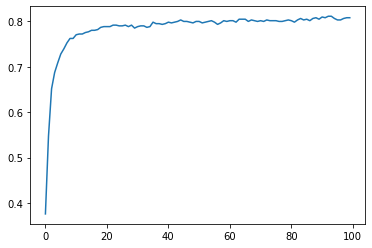

In [13]:
plt.plot(History.history['accuracy'])

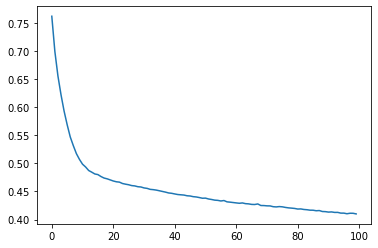

In [14]:
plt.plot(History.history['loss'])

<function matplotlib.pyplot.show(close=None, block=None)>

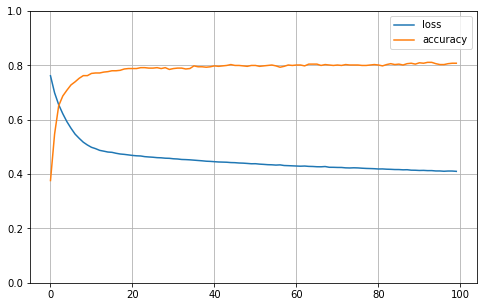

In [15]:
Performance=pd.DataFrame(History.history)
Performance.plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## Evaluating the Model

In [16]:
Model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.7922


[0.453743040561676, 0.7922077775001526]

# Method 2 (Split the Data to Train and Test with ANN)

In [17]:
HistoryTT=Model.fit(X, y, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

In [18]:
print(HistoryTT.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


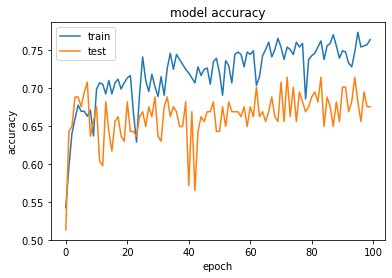

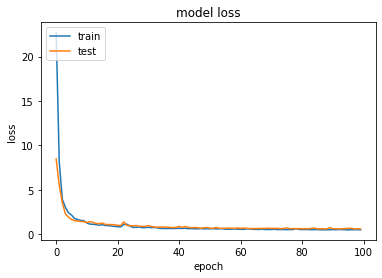

In [19]:
plt.plot(HistoryTT.history['accuracy'])
plt.plot(HistoryTT.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(HistoryTT.history['loss'])
plt.plot(HistoryTT.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Use the Model for a New Person

In [20]:
# Let's say, a new person go to a clinic, they do her medical measurements, and here is the prediction by the model, whether 
# she is at onset of dibetes or okay! 
NewPersonMedicalTest=[[0,118,84,47,230,45.8,0.551,31]]
Model.predict(sc.transform(NewPersonMedicalTest))
# Result shows [Probability of Healthy, Probability of Diabetic]

array([[0.76652277, 0.16482878]], dtype=float32)

##### End